<a href="https://colab.research.google.com/github/profcarlos/artigos/blob/main/SBAI_2021_logica_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instalação do pacote skfuzzy
!pip install networkx
!pip install scikit-fuzzy


In [ ]:
# importando pacotes
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Crie as três variáveis ​​fuzzy - duas entradas, um a saida
setpoint = ctrl.Antecedent(np.arange(1, 7, .1), 'setpoint')
delta = ctrl.Antecedent(np.arange(-7, 7, .01), 'delta')
frequencia = ctrl.Consequent(np.arange(30, 60, 1), 'frequencia')

# Cria as funções de pertinência usando tipos variados
#termos utilizados: muito baixo=mbx,baixo=bx, estável=est, alto=ma, muito alto=mal
#utilizando a função triangular = fuzz.trimf

setpoint['mal'] = fuzz.trimf(setpoint.universe, [4.5, 5.5, 6.5])
setpoint['al'] = fuzz.trimf(setpoint.universe, [4, 4.5, 5.5])
setpoint['est'] = fuzz.trimf(setpoint.universe, [3.5, 4, 4.5])
setpoint['bx'] = fuzz.trimf(setpoint.universe, [2.5, 3.5, 3.8])
setpoint['mbx'] = fuzz.trimf(setpoint.universe, [2, 3, 3.5])

delta['mal'] = fuzz.trimf(delta.universe, [0.20, 1, 6.5])
delta['al'] = fuzz.trimf(delta.universe, [0.1, 0.20, 0.25])
delta['est'] = fuzz.trimf(delta.universe, [-0.15, 0, 0.15])
delta['bx'] = fuzz.trimf(delta.universe, [-.25, -.2, -.1])
delta['mbx'] = fuzz.trimf(delta.universe, [-6.5, -1, -.20])

frequencia['mal'] = fuzz.trimf(frequencia.universe, [50, 53, 55])
frequencia['al'] = fuzz.trimf(frequencia.universe, [46, 49, 51])
frequencia['est'] = fuzz.trimf(frequencia.universe, [42, 45, 47])
frequencia['bx'] = fuzz.trimf(frequencia.universe, [39, 41, 43])
frequencia['mbx'] = fuzz.trimf(frequencia.universe, [35, 38, 40])



### Mostrando graficamente as funções de partinência criadas

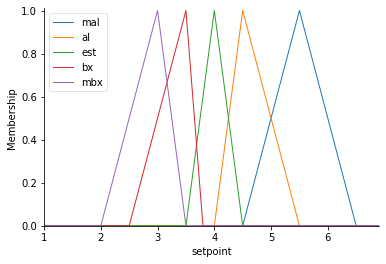

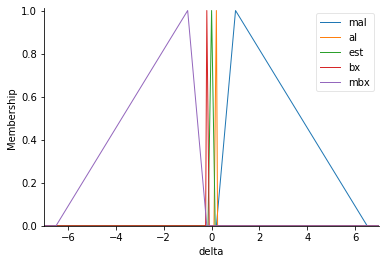

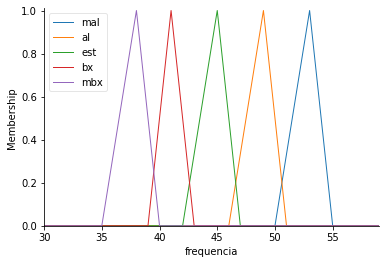

In [ ]:
setpoint.view()
delta.view()
frequencia.view()


### Criando as regras de decisão difusas

In [ ]:
#Este sistema possui um conjunto de regras complexo e totalmente conectado, definido a seguir.
 
regra1 = ctrl.Rule(antecedent=((setpoint['mbx'] & delta['mbx']) |
                              (setpoint['bx'] & delta['mbx']) |
                              (setpoint['mbx'] & delta['bx'])),
                  consequent=frequencia['mal'], label='rule nb')

regra2 = ctrl.Rule(antecedent=((setpoint['mbx'] & delta['est']) |
                              (setpoint['mbx'] & delta['al']) |
                              (setpoint['bx'] & delta['bx']) |
                              (setpoint['bx'] & delta['est']) |
                              (setpoint['est'] & delta['bx']) |
                              (setpoint['est'] & delta['mbx']) |
                              (setpoint['al'] & delta['mbx'])),
                  consequent=frequencia['al'], label='rule ns')

regra3 = ctrl.Rule(antecedent=((setpoint['mbx'] & delta['mal']) |
                              (setpoint['bx'] & delta['al']) |
                              (setpoint['est'] & delta['est']) |
                              (setpoint['al'] & delta['bx']) |
                              (setpoint['mal'] & delta['mbx'])),
                  consequent=frequencia['est'], label='rule ze')

regra4 = ctrl.Rule(antecedent=((setpoint['bx'] & delta['mal']) |
                              (setpoint['est'] & delta['mal']) |
                              (setpoint['est'] & delta['al']) |
                              (setpoint['al'] & delta['al']) |
                              (setpoint['al'] & delta['est']) |
                              (setpoint['mal'] & delta['est']) |
                              (setpoint['mal'] & delta['bx'])),
                  consequent=frequencia['bx'], label='rule ps')

regra5 = ctrl.Rule(antecedent=((setpoint['al'] & delta['mal']) |
                              (setpoint['mal'] & delta['mal']) |
                              (setpoint['mal'] & delta['al'])),
                  consequent=frequencia['mbx'], label='rule pb')




### Criando e simulando um controlador fuzzy

52.52456140350877


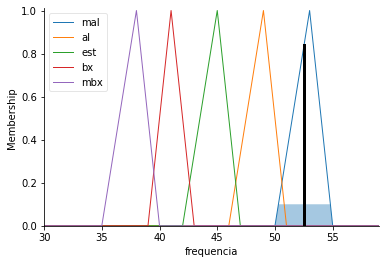

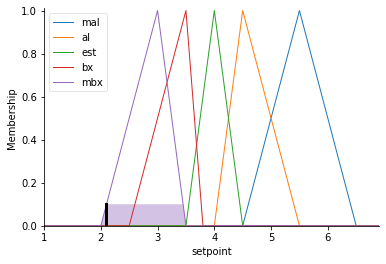

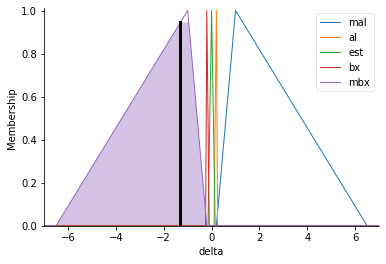

In [ ]:
#Em seguida, adicionamos essas regras a um novo ControlSystem e definimos um ControlSystemSimulationpara executá-lo.
system = ctrl.ControlSystem(rules=[regra1, regra2, regra3, regra4, regra5])

simulador = ctrl.ControlSystemSimulation(system)

# Entrando com alguns valores setpoint e delta
simulador.input['setpoint'] = 2.1
simulador.input['delta'] = -1.3

# Computando o resultado
simulador.compute()
print(simulador.output['frequencia'])

frequencia.view(sim=simulador)
setpoint.view(sim=simulador)
delta.view(sim=simulador)





